In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread,imsave
from skimage.feature import match_template
from fitting import circle,fitCircle,genData,RANSAC

**Normalized cross-correlation**

First, we load in a photo and a template of a feature we wish to find. In this case, a sat-photo of a Cuban missile site and a picture of trailers which we want to locate in the image.

In [2]:
photo = imread('u2cuba.jpg',mode='RGB',flatten=True)
template = imread('trailer.png',mode='RGB',flatten=True)

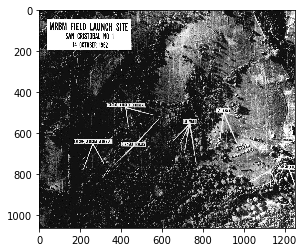

In [3]:
plt.imshow(photo,cmap='gray')
plt.show()

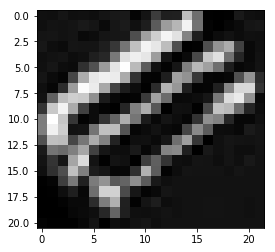

In [4]:
plt.imshow(template,cmap='gray')
plt.show()

Next, we compute the normalized cross-correlation of the template and the image. This *should* result in noticeable peaks at the trailer locations.

In [5]:
crossCorr = match_template(photo,template,pad_input='True')

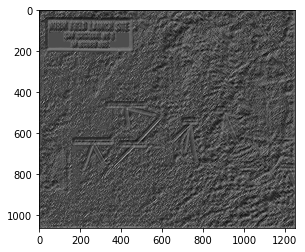

In [6]:
plt.imshow(crossCorr,cmap='gray')
plt.show()

Not entirely sure why the trailers aren't showing up as nice peaks in the cross-correlation map. Obviously, there is a lot of noise, since any line with an appropriate slope probably is a reasonable match to the template. Also, you can see noticeable artifacts where there were strong lines parallel to the trailer angle in the photograph. Maybe the template just isn't specific enough?

Next, compute the same correlation, but with a larger template size. In this case, the pixel size of the template is large compared to the pixel size of the actual trailers in the main image.

In [7]:
largeTemplate = imread('trailerSlightlyBigger.png',mode='RGB',flatten=True)

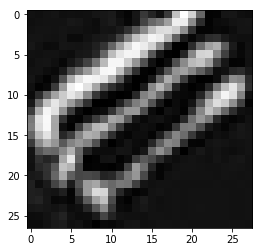

In [8]:
plt.imshow(largeTemplate,cmap='gray')
plt.show()

In [9]:
crossCorrLarge = match_template(photo,largeTemplate,pad_input='True')

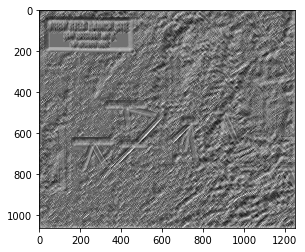

In [10]:
plt.imshow(crossCorrLarge,cmap='gray')
plt.show()

**Fitting circles**

Testing a least-squares fit to a circle with perfect data (+ Gaussian noise)

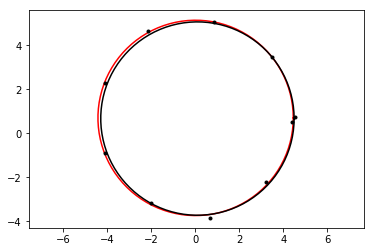

In [11]:
N = 10
sigma = 0.1
outlier = 0
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = fitCircle(data)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.figure(0)
plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Now, add 10% outliers and do a least-squares fit. This should look pretty bad.

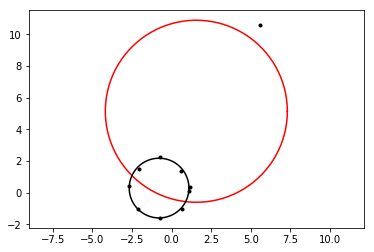

In [12]:
outlier = 0.1
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = fitCircle(data);

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

**RANSAC for circles**

Repeat all the steps above, but now using RANSAC+least-squares to fit the circles. This should do a reasonable job of fitting the outlier version, but may work less well for the perfect data due to the limitations of RANSAC. For such a small number of points, though, it's probably going to work well.

First, the perfect data...

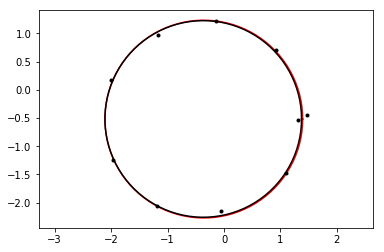

In [13]:
outlier = 0
maxIter = 100
maxInlierError = 8
goodFitThresh = 5
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = RANSAC(data,maxIter,maxInlierError,goodFitThresh)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Now, the outliers.

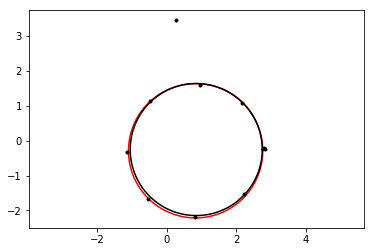

In [14]:
outlier = 0.1
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = RANSAC(data,maxIter,maxInlierError,goodFitThresh)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Now, let's test *N* = 1000 points instead of 10.

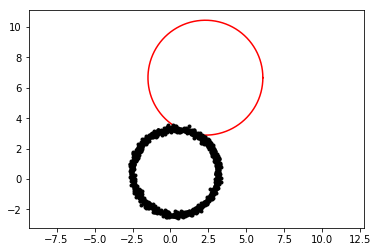

In [15]:
N = 1000
outlier = 0
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = RANSAC(data,maxIter,maxInlierError,goodFitThresh)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Ew. I think I see the problem here. For each random model, we only pick 3 points, and the high density of points means that those are not likely to be 3 which give a good model fit. However, since our error threshold is so high and required number of good points is so low, we probably always count it as a "good" model anyway, and over the number of iterations we have we end up picking the least bad option, which is not necessarily good. What if we reduce the maximum inlier error threshold while increasing the number of points necessary to count as a good fit?

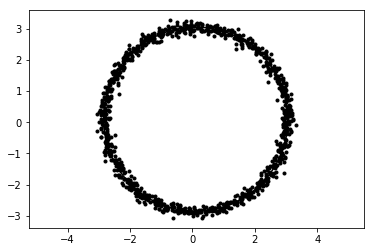

In [16]:
maxIter = 100
maxInlierError = 0.08
goodFitThresh = 500
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = RANSAC(data,maxIter,maxInlierError,goodFitThresh)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Better! How about outliers?

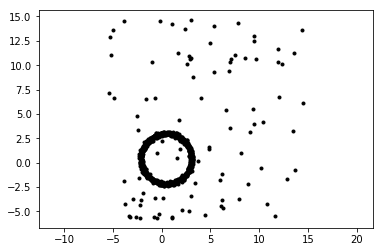

In [17]:
outlier = 0.1
[data,trueX,trueY,trueR] = genData(N,sigma,outlier)
[cx,cy,R] = RANSAC(data,maxIter,maxInlierError,goodFitThresh)

circleFit = circle(cx,cy,R,100)
circleTrue = circle(trueX,trueY,trueR,100)

plt.plot(circleFit[:,0],circleFit[:,1],'r')
plt.plot(circleTrue[:,0],circleTrue[:,1],'k')
plt.plot(data[:,0],data[:,1],'k.')
plt.axis('equal')
plt.show()

Looks good to me!